In [39]:
#Google Stock Price prediction using RNN 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To read traing data of google share price 
df=pd.read_csv("TATAMOTORS.csv")
#training_set user defined dataframe
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-18,296.899994,297.750000,292.600006,293.350006,293.350006,18004320
1,2021-08-20,289.500000,290.700012,281.000000,283.100006,283.100006,32578752
2,2021-08-23,287.200012,288.299988,275.000000,276.950012,276.950012,24498294
3,2021-08-24,278.500000,281.500000,268.450012,279.799988,279.799988,37589121
4,2021-08-25,282.799988,289.200012,282.450012,284.399994,284.399994,31538128


In [3]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-18,296.899994,297.750000,292.600006,293.350006,293.350006,18004320
1,2021-08-20,289.500000,290.700012,281.000000,283.100006,283.100006,32578752
2,2021-08-23,287.200012,288.299988,275.000000,276.950012,276.950012,24498294
3,2021-08-24,278.500000,281.500000,268.450012,279.799988,279.799988,37589121
4,2021-08-25,282.799988,289.200012,282.450012,284.399994,284.399994,31538128


In [5]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [6]:
df['Date'].min()

Timestamp('2021-08-18 00:00:00')

In [7]:
df['Date'].max()

Timestamp('2022-08-18 00:00:00')

In [8]:
#To check null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
#separate Open column from given dataset 
df1=df.iloc[:,1:2].values #or df1=df['Open']  df.loc[:,'Open']
#1:2 means start=1 and stop=2-1=1
type(df1)

numpy.ndarray

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
mms=MinMaxScaler()
df1=mms.fit_transform(df1)

In [12]:
df1

array([[0.07274162],
       [0.04348685],
       [0.03439419],
       [0.        ],
       [0.01699936],
       [0.0251038 ],
       [0.01739472],
       [0.04585889],
       [0.05238189],
       [0.04151018],
       [0.06621862],
       [0.0553469 ],
       [0.07511366],
       [0.07452068],
       [0.05930025],
       [0.06127693],
       [0.08104368],
       [0.09389207],
       [0.10911249],
       [0.1379719 ],
       [0.13243723],
       [0.10436842],
       [0.07946236],
       [0.09745006],
       [0.1371813 ],
       [0.18422615],
       [0.17651707],
       [0.21941094],
       [0.18383079],
       [0.20853923],
       [0.21407389],
       [0.23048027],
       [0.2449101 ],
       [0.27080449],
       [0.24747975],
       [0.4245898 ],
       [0.44139153],
       [0.57125912],
       [0.72899777],
       [0.99426759],
       [0.90334054],
       [0.92488634],
       [0.80371606],
       [0.84305195],
       [0.91480523],
       [0.85155163],
       [0.81043681],
       [0.898

In [13]:
#Find the total number of records 
df1.shape

(249, 1)

In [14]:
#separate Input and output from Open column 
X_train=df1[0:248] #start=0 steop=1258-1=1257 
Y_train=df1[1:249] 

In [15]:
X_train.shape

(248, 1)

In [16]:
Y_train.shape

(248, 1)

In [17]:
X_train.ndim

2

In [18]:
X_train=np.reshape(X_train,(248,1,1))

In [19]:
#To check dimension
X_train.ndim

3

In [20]:
X_train

array([[[0.07274162]],

       [[0.04348685]],

       [[0.03439419]],

       [[0.        ]],

       [[0.01699936]],

       [[0.0251038 ]],

       [[0.01739472]],

       [[0.04585889]],

       [[0.05238189]],

       [[0.04151018]],

       [[0.06621862]],

       [[0.0553469 ]],

       [[0.07511366]],

       [[0.07452068]],

       [[0.05930025]],

       [[0.06127693]],

       [[0.08104368]],

       [[0.09389207]],

       [[0.10911249]],

       [[0.1379719 ]],

       [[0.13243723]],

       [[0.10436842]],

       [[0.07946236]],

       [[0.09745006]],

       [[0.1371813 ]],

       [[0.18422615]],

       [[0.17651707]],

       [[0.21941094]],

       [[0.18383079]],

       [[0.20853923]],

       [[0.21407389]],

       [[0.23048027]],

       [[0.2449101 ]],

       [[0.27080449]],

       [[0.24747975]],

       [[0.4245898 ]],

       [[0.44139153]],

       [[0.57125912]],

       [[0.72899777]],

       [[0.99426759]],

       [[0.90334054]],

       [[0.92488

In [21]:
#Part-2 : -
#Building the RNN with LSTM 
#Recurrent neural network 
#LSTM means long short term memory 
from tensorflow.keras.models import Sequential #initialise neural network
from tensorflow.keras.layers import Dense,Dropout #to add input layer,output layer,
#and hidden layer
from tensorflow.keras.layers import LSTM  #to use built the model 
#LSTM : to manage internal memory , to store previous o/p 
#long short term memory 


In [22]:
#create objecgt of Sequential class
model=Sequential()

In [23]:
#To add layers in model
#This layer are input layer and LSTM layer 
model.add(LSTM(units=50,activation='sigmoid',input_shape=(None,1)))
#None means to take no. of rows and 1 means 1 column

#To add output layer 
model.add(Dropout(0.1))
model.add(Dense(units=1,activation='linear'))

In [24]:
#compile the model 
model.compile(optimizer='adam',loss='mean_squared_error')

In [25]:
X_train1=X_train[:198]
X_test=X_train[198:]

In [26]:
len(X_train1),len(X_test)

(198, 50)

In [27]:
Y_train1=Y_train[:198]
Y_test=Y_train[198:]

In [28]:
len(Y_train1),len(Y_test)

(198, 50)

In [29]:
# Create Early stopping means create a call back
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [30]:
#Train the model
trained_model=model.fit(X_train1,Y_train1,validation_data=(X_test,Y_test),epochs=250,callbacks=callback,validation_split=0.2)# means 20% data of training data X_train)
#80% for training and 20% for validation

Epoch 1/250
7/7 [==============================] - 3s 98ms/step - loss: 0.2775 - val_loss: 0.1421
Epoch 2/250
7/7 [==============================] - 0s 11ms/step - loss: 0.1926 - val_loss: 0.0719
Epoch 3/250
7/7 [==============================] - 0s 13ms/step - loss: 0.1357 - val_loss: 0.0323
Epoch 4/250
7/7 [==============================] - 0s 15ms/step - loss: 0.1015 - val_loss: 0.0158
Epoch 5/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0864 - val_loss: 0.0114
Epoch 6/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0890 - val_loss: 0.0117
Epoch 7/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0904 - val_loss: 0.0123
Epoch 8/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0881 - val_loss: 0.0116
Epoch 9/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0913 - val_loss: 0.0112
Epoch 10/250
7/7 [==============================] - 0s 15ms/step - loss: 0.0879 - val_loss: 0.0109
Epoch 11/250
7/7 [=

Epoch 84/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0376 - val_loss: 0.0042
Epoch 85/250
7/7 [==============================] - 0s 11ms/step - loss: 0.0376 - val_loss: 0.0046
Epoch 86/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0386 - val_loss: 0.0044
Epoch 87/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0458 - val_loss: 0.0039
Epoch 88/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0374 - val_loss: 0.0039
Epoch 89/250
7/7 [==============================] - 0s 15ms/step - loss: 0.0359 - val_loss: 0.0038
Epoch 90/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0397 - val_loss: 0.0042
Epoch 91/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0382 - val_loss: 0.0040
Epoch 92/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0332 - val_loss: 0.0039
Epoch 93/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0367 - val_loss: 0.0036
Epoch 94/2

7/7 [==============================] - 0s 12ms/step - loss: 0.0201 - val_loss: 0.0016
Epoch 167/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0183 - val_loss: 0.0021
Epoch 168/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0177 - val_loss: 0.0018
Epoch 169/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0216 - val_loss: 0.0016
Epoch 170/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0207 - val_loss: 0.0018
Epoch 171/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0180 - val_loss: 0.0016
Epoch 172/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0190 - val_loss: 0.0020
Epoch 173/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0193 - val_loss: 0.0019
Epoch 174/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0193 - val_loss: 0.0019
Epoch 175/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0211 - val_loss: 0.0026
Epoch 176/250


7/7 [==============================] - 0s 14ms/step - loss: 0.0136 - val_loss: 0.0021
Epoch 249/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0163 - val_loss: 0.0021
Epoch 250/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0131 - val_loss: 0.0014


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


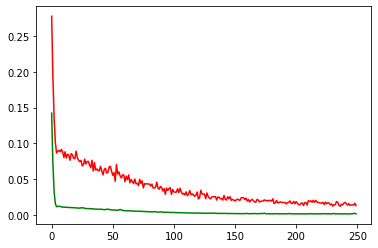

In [32]:
plt.plot(trained_model.history['loss'],color='red',label='training loss')
plt.plot(trained_model.history['val_loss'],color='green',label='validation loss')
plt.show()


In [33]:
Y_pred=model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [34]:
Y_pred

array([[0.6231226 ],
       [0.64446837],
       [0.62105364],
       [0.59030557],
       [0.5622267 ],
       [0.5208265 ],
       [0.54520005],
       [0.57991606],
       [0.46824414],
       [0.47734421],
       [0.47191995],
       [0.49779555],
       [0.4974462 ],
       [0.54520005],
       [0.5714224 ],
       [0.54972017],
       [0.5523271 ],
       [0.57402337],
       [0.5474604 ],
       [0.5505892 ],
       [0.5625739 ],
       [0.55910164],
       [0.5795695 ],
       [0.6360403 ],
       [0.64223313],
       [0.6248461 ],
       [0.623812  ],
       [0.60759366],
       [0.616742  ],
       [0.6624965 ],
       [0.67209315],
       [0.6980754 ],
       [0.6932966 ],
       [0.7057484 ],
       [0.703703  ],
       [0.6787691 ],
       [0.65288687],
       [0.6497954 ],
       [0.6666109 ],
       [0.68988115],
       [0.7812878 ],
       [0.76814616],
       [0.76190174],
       [0.74753106],
       [0.7377052 ],
       [0.7512538 ],
       [0.793559  ],
       [0.770

In [35]:
Y_test

array([[0.63332676],
       [0.60644391],
       [0.57125912],
       [0.53923695],
       [0.49219211],
       [0.51986556],
       [0.55939906],
       [0.43269424],
       [0.44297285],
       [0.43684521],
       [0.46609997],
       [0.46570462],
       [0.51986556],
       [0.54971331],
       [0.52500487],
       [0.52796988],
       [0.55267832],
       [0.52243522],
       [0.52599321],
       [0.53963231],
       [0.53567896],
       [0.55900371],
       [0.62364101],
       [0.63075699],
       [0.61079262],
       [0.60960666],
       [0.59102587],
       [0.60150222],
       [0.65408185],
       [0.66515118],
       [0.69519667],
       [0.689662  ],
       [0.70409171],
       [0.70171967],
       [0.67286026],
       [0.6430124 ],
       [0.63945441],
       [0.6588258 ],
       [0.68570865],
       [0.79225137],
       [0.77683333],
       [0.76951961],
       [0.75271787],
       [0.74125318],
       [0.75706658],
       [0.80668108],
       [0.77979834],
       [0.795

In [36]:
#To remove scaling on Y_pred  , use inverse_transform which are define
#in MinMAxScaler class
Y_test1=mms.inverse_transform(Y_test)
Y_test1

array([[438.700012],
       [431.899994],
       [423.      ],
       [414.899994],
       [403.      ],
       [410.      ],
       [420.      ],
       [387.950012],
       [390.549988],
       [389.      ],
       [396.399994],
       [396.299988],
       [410.      ],
       [417.549988],
       [411.299988],
       [412.049988],
       [418.299988],
       [410.649994],
       [411.549988],
       [415.      ],
       [414.      ],
       [419.899994],
       [436.25    ],
       [438.049988],
       [433.      ],
       [432.700012],
       [428.      ],
       [430.649994],
       [443.950012],
       [446.75    ],
       [454.350006],
       [452.950012],
       [456.600006],
       [456.      ],
       [448.700012],
       [441.149994],
       [440.25    ],
       [445.149994],
       [451.950012],
       [478.899994],
       [475.      ],
       [473.149994],
       [468.899994],
       [466.      ],
       [470.      ],
       [482.549988],
       [475.75    ],
       [479.6

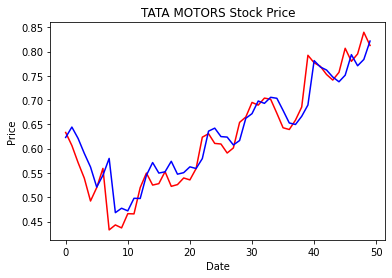

In [37]:
plt.plot(Y_test,color='red',label='Actual Stock Price')
plt.plot(Y_pred,color='blue',label='Predicted Stock Price')
plt.title('TATA MOTORS Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [38]:
#Predict next day stock price 
n=float(input("Enter Today Opening Stock price : "))
#here n is a scaler variable
#print(type(n))
#First, converts n into 2D numpy array 
n=np.array(n).reshape(-1,1) #here -1 means None means automatic accept no. 
#of rows but next 1 means no. of columns 
#print(type(n))
#print(n.ndim)
#Apply scaling : mormalisation means MinMaxScaler 
n1=mms.transform(n)
#print(n1)
#converts n1 from 2D into 3D array 
v=n1.reshape(-1,1,1)
#print(v)
#prediction 
pred=model.predict(v)
#print(pred)
#to remove scaling from pred
final=mms.inverse_transform(pred)
print("Opening Price of Next day : ",final)

Enter Today Opening Stock price : 191.05
1/1 [==============================] - 0s 32ms/step
Opening Price of Next day :  [[222.13853]]
